<a href="https://colab.research.google.com/github/SHUBHR1005/CODSOFT-PROJECTS/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CREDIT CARD FRAUD DETECTION:

---
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


## INTRODUCTION:
---
The most prominent form of payment is a credit card. The main problems within the credit card trade are ongoing a fraud. The credit card company faces a huge loss if the cardholder does not detect the loss. An awfully very little quantity of data is needed by the assaulter for conducting any fallacious dealing in online transactions. During analysis work, numerous methods and outcome are reviewed, in terms of definite parameters.

## LIBRARIES AND MODULES

---



In [2]:
# Libraries
import numpy as np
import pandas as  pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Modules
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

## DATA

---
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [3]:
data=pd.read_csv('/creditcard.csv')
data.dropna(inplace=True)
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EXPLORATORY DATA ANALYSIS

### COUNT OF FRAUD AND SAFE TRANSACTIONS

---



In [ ]:
f = data[data['Class'] == 1] # fraud
s = data[data['Class'] == 0] # safe
print('The number of fraud transactions are : {}'.format(f.shape[0]))
print('The number of safe transactions are : {}'.format(s.shape[0]))

The number of fraud transactions are : 492
The number of safe transactions are : 284315


### DONUT CHART SHOWING DISTRIBUTION OF FRAUD AND SAFE TRANSACTIONS

---



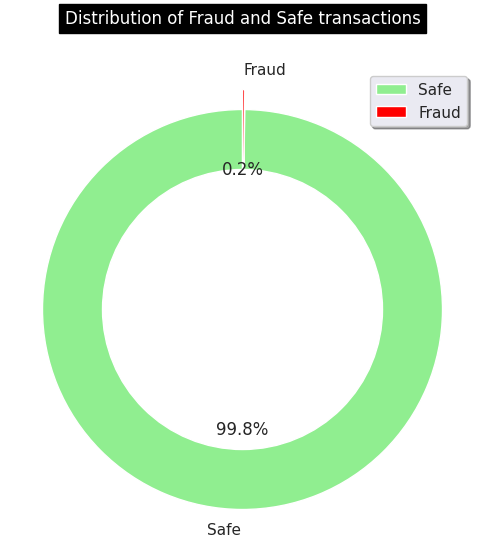

In [ ]:
# Count the number of fraud and safe transactions
m = data['Class'].value_counts()

# Create a donut chart
labels = ['Safe', 'Fraud']
sizes = m.values
colors = ['lightgreen', 'red']
explode = (0, 0.1)  # To make the second slice (fraud) explode out, you can adjust the value to your preference

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)

# Draw a white circle in the center to create the donut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax1.axis('equal')
plt.legend(loc='best', shadow=True)
plt.title('Distribution of Fraud and Safe transactions', y=1.08, backgroundcolor='black', color='white')
plt.show()

>  INTERPRETATION:

---


> * This graph shows that the data is highly imbalanced. Almost 99.8% of total transactions are safe and fraud transactions account for only 0.2%  of the total transactions.

### CORRELATION PLOT

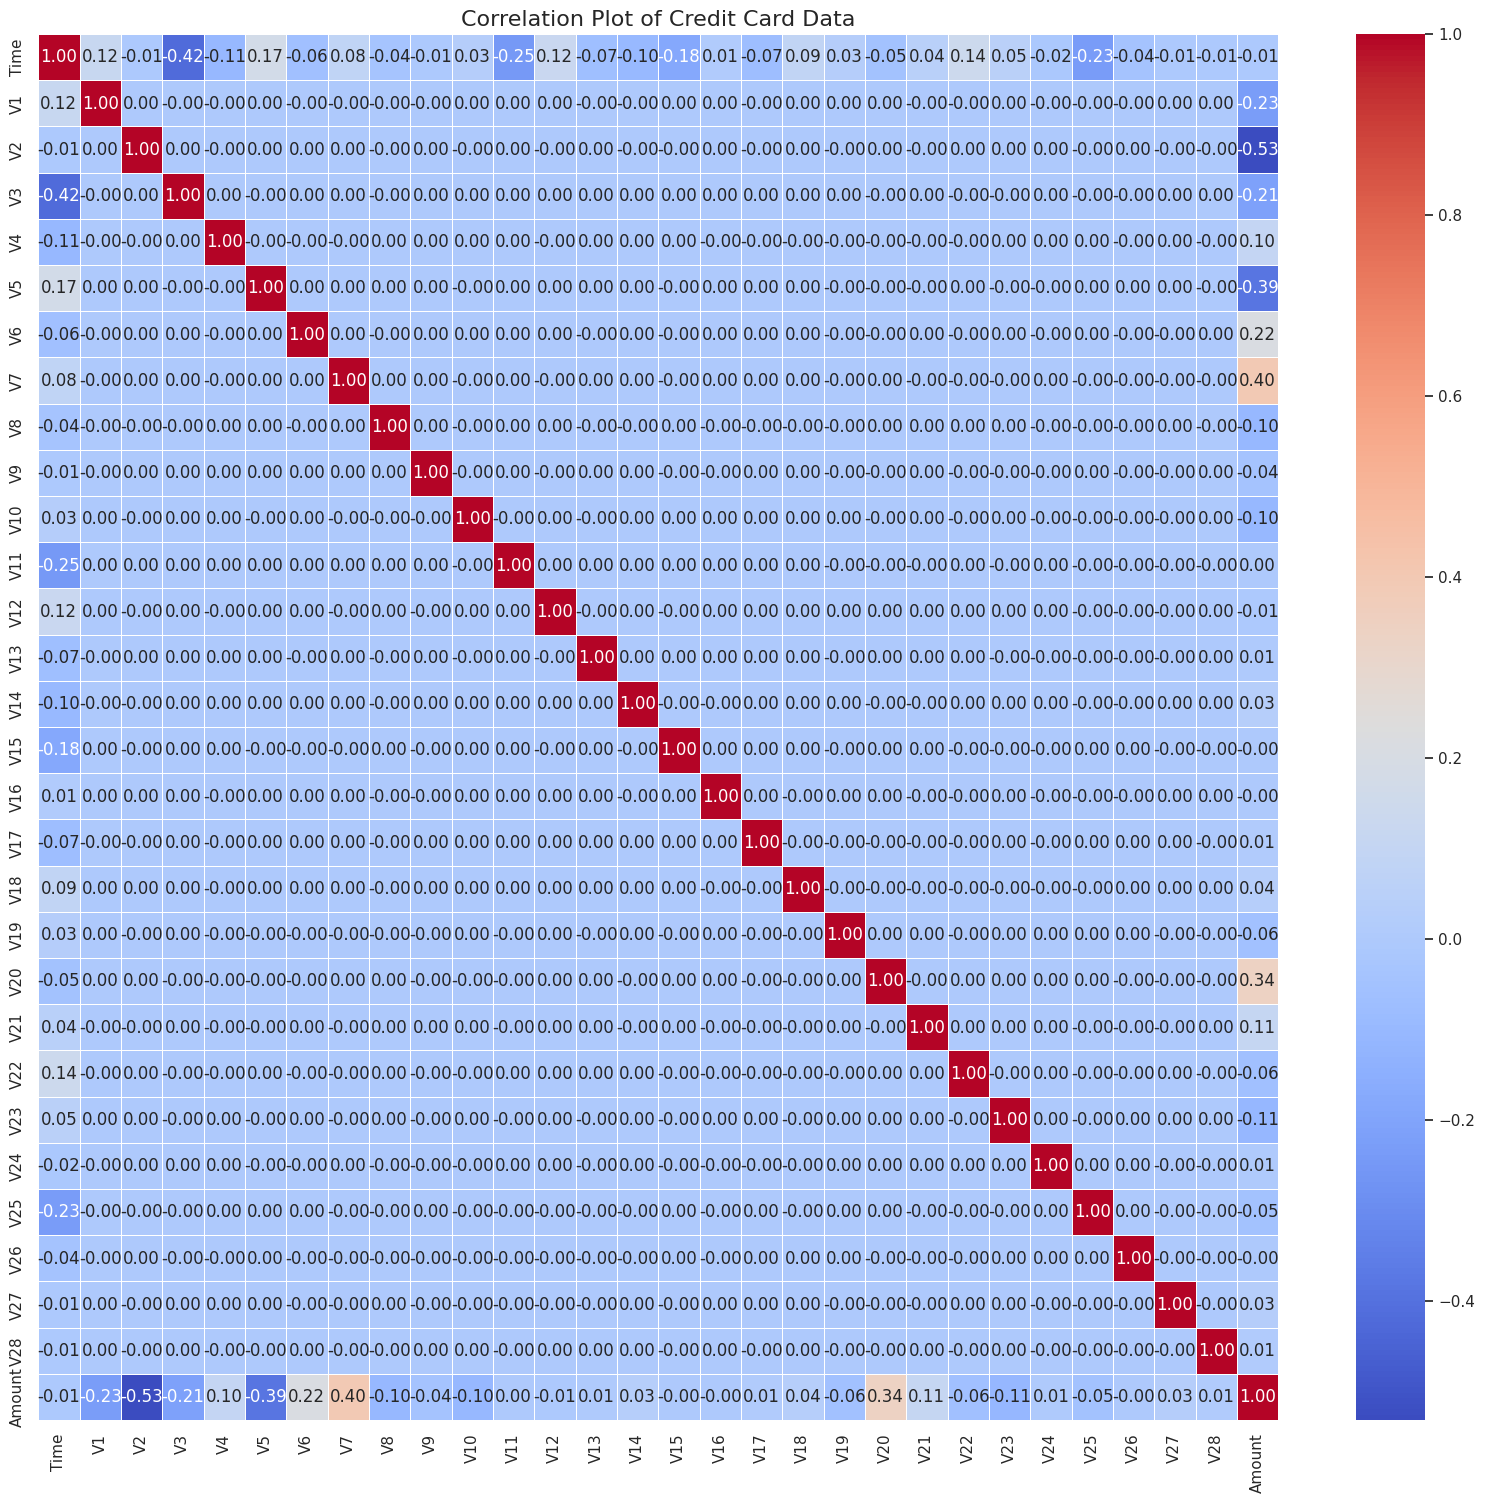

In [ ]:
# Drop the 'Class' column from the data
data.drop('Class', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Credit Card Data', fontsize=16)
plt.show()

> **INTERPRETATION**

---

> * MULTICOLINEARITY IS NOT PRESENT SO WE KEEP ALL FEATURE VARIABLES IN MODEL.

### BARPLOT OF AVERAGE TRANSACTION AMOUNT BY CLASS

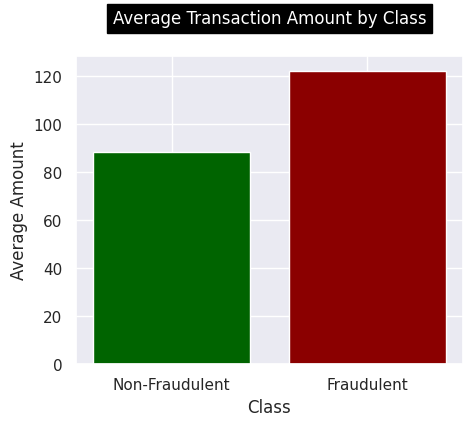

In [ ]:
# Group the data by 'Class' and calculate the average amount for each class
average_amount_by_class = data.groupby('Class')['Amount'].mean()

# Plot the average amount for each class with different colors
fig1, ax1 = plt.subplots(figsize=(5, 4))
plt.bar(average_amount_by_class.index, average_amount_by_class.values, color=['darkgreen', 'darkred'])
plt.xticks(average_amount_by_class.index, ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Class')
plt.ylabel('Average Amount')
plt.title('Average Transaction Amount by Class', y=1.08, backgroundcolor='black', color='white')
plt.show()

## SMOTEEN

---
From the Donut Chart it is evident that the data is highly imbalanced so we applied the concept of **SMOTEEN (Synthetic Minority Over-sampling Technique(SMOTE) and Edited Nearest Neighbors(ENN))**. SMOTEENN is used to handle imbalanced datasets, where one class is significantly underrepresented compared to the other class(es). SMOTEEN is a hybrid resampling technique. It first performs oversampling using SMOTE to create synthetic samples for the minority class, increasing its representation. Then, it applies undersampling through ENN to remove noisy instances from the majority class, reducing its size. This results in a balanced dataset for improved model training on imbalanced data.

### TRAIN TEST SPLIT
---

We now split our dataset into training and testing sets. We perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']
# Create an instance of SMOTEENN
smote_enn = SMOTEENN(random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Perform oversampling on the training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

### STANDARIZATION OF THE VARIABLES

---

Standardization is an essential preprocessing step in logistic regression to ensure better convergence, model interpretability, and fair comparison of feature contributions.

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

###  TERMINOLOGIES

---


*   **ACCURACY SCORE:** The base metric used for model evaluation is often Accuracy, describing the number of correct predictions over all predictions.
*    **PRECISION SCORE:** Precision is a measure of how many of the positive predictions made are correct (true positives).


*   **RECALL SCORE:** Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. This is also called 'Sensitivity'.
*   **F1 SCORE:** F1-Score is a measure combining both precision and recall.







## 1.   LOGISTIC REGRESSION

---





Confusion Matrix (Training Set):


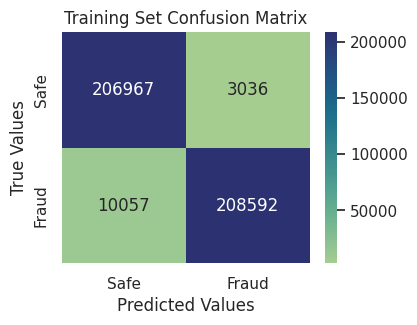

Confusion Matrix (Testing Set):


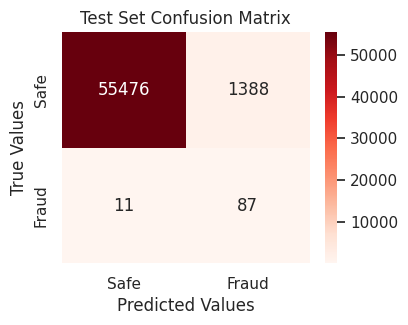

In [ ]:
# Fitting the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training set
pred_tr = model.predict_proba(X_train)[:, 1]  # Probability of positive class (class01 = 1)

# Calculate ROC-AUC score for training set
ROC_logistic = roc_auc_score(y_train_resampled, pred_tr)

# Find the threshold corresponding to the highest specificity * sensitivity (co = sensitivity * specificity)
thresholds = model.decision_function(X_train_resampled)
fpr, tpr, threshold = roc_curve(y_train_resampled, pred_tr)
co = tpr * (1 - fpr)
cutoff = threshold[co.argmax()]

# Make predictions on the training set using the chosen threshold
pred_val = (pred_tr > cutoff).astype(int)

# Confusion matrix for the training set
print("Confusion Matrix (Training Set):")
CM_train = confusion_matrix(y_train_resampled, pred_val)
class_labels = ['Safe', 'Fraud']
sns.heatmap(CM_train, annot=True, fmt='d', cmap="crest", xticklabels=class_labels, yticklabels=class_labels)
sns.set(rc={'figure.figsize':(4,3)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Training Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Accuracy of the training model
train_accuracy_logistic = accuracy_score(y_train_resampled, pred_val)
train_precision_logistic = precision_score(y_train_resampled, pred_val)
train_recall_logistic = recall_score(y_train_resampled, pred_val)
train_f1_score_logistic = f1_score(y_train_resampled, pred_val)

# Make predictions on the testing set
pred_ts = model.predict_proba(X_test)[:, 1]

# Find the threshold corresponding to the highest sensitivity * specificity (co = sensitivity * specificity)
fpr_ts, tpr_ts, threshold_ts = roc_curve(y_test, pred_ts)
co_ts = tpr_ts * (1 - fpr_ts)
cutoff_ts = threshold_ts[co_ts.argmax()]

# Make predictions on the testing set using the chosen threshold
pred_val_ts = (pred_ts > cutoff_ts).astype(int)

# Confusion matrix for the testing set
print("Confusion Matrix (Testing Set):")
CM_test = confusion_matrix(y_test, pred_val_ts)
class_labels = ['Safe', 'Fraud']
sns.heatmap(CM_test, annot=True, fmt='d', cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
sns.set(rc={'figure.figsize':(4,3)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Test Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Accuracy of the model on the test set
test_accuracy_logistic = accuracy_score(y_test, pred_val_ts)
test_precision_logistic = precision_score(y_test, pred_val_ts)
test_recall_logistic = recall_score(y_test, pred_val_ts)
test_f1_score_logistic = f1_score(y_test, pred_val_ts)

d = {
    'Accuracy Score': [train_accuracy_logistic, test_accuracy_logistic],
    'Precision Score': [train_precision_logistic, test_precision_logistic],
    'Recall Score': [train_recall_logistic, test_recall_logistic],
    'f1 Score': [train_f1_score_logistic, test_f1_score_logistic]
}
df = pd.DataFrame(d)
df.index = ['Train', 'Test']

## 2. RANDOM FOREST CLASSIFIER

---



Confusion Matrix (Training Set):


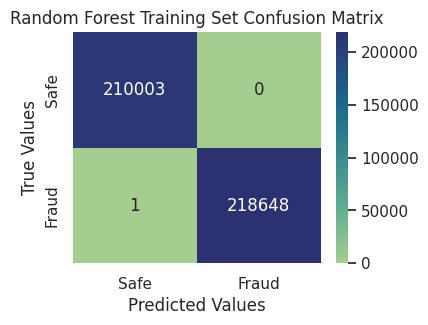

Random Forest Confusion Matrix (Testing Set):


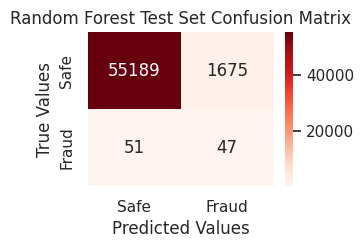

In [ ]:
rf_model = RandomForestClassifier()
result=rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training set
pred_tr_rf = rf_model.predict_proba(X_train_resampled)[:, 1]  # Probability of positive class (class01 = 1)

# Calculate ROC-AUC score for training set
ROC_random_forest = roc_auc_score(y_train_resampled, pred_tr_rf)

# Find the threshold corresponding to the highest sensitivity * specificity (co = sensitivity * specificity)
thresholds_rf = rf_model.predict_proba(X_train_resampled)[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_train_resampled, pred_tr_rf)
co_rf = tpr_rf * (1 - fpr_rf)
cutoff_rf = threshold_rf[co_rf.argmax()]

# Make predictions on the training set using the chosen threshold
pred_val_rf = (pred_tr_rf > cutoff_rf).astype(int)

# Confusion matrix for the training set
print("Confusion Matrix (Training Set):")
CM_rf = confusion_matrix(y_train_resampled, pred_val_rf)
class_labels_rf = ['Safe', 'Fraud']
sns.heatmap(CM_rf, annot=True, fmt='d', cmap="crest", xticklabels=class_labels_rf, yticklabels=class_labels_rf)
sns.set(rc={'figure.figsize':(3,2)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Random Forest Training Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels_rf)) + 0.5, class_labels_rf)
plt.yticks(np.arange(len(class_labels_rf)) + 0.5, class_labels_rf)
plt.show()

# Accuracy of the Random Forest training model
train_accuracy_rf = accuracy_score(y_train_resampled, pred_val_rf)
train_precision_rf = precision_score(y_train_resampled, pred_val_rf)
train_recall_rf = recall_score(y_train_resampled, pred_val_rf)
train_f1_score_rf = f1_score(y_train_resampled, pred_val_rf)

# Make predictions on the testing set
pred_ts_rf = rf_model.predict_proba(X_test)[:, 1]

# Find the threshold corresponding to the highest sensitivity * specificity (co = sensitivity * specificity)
fpr_ts_rf, tpr_ts_rf, threshold_ts_rf = roc_curve(y_test, pred_ts_rf)
co_ts_rf = tpr_ts_rf * (1 - fpr_ts_rf)
cutoff_ts_rf = threshold_ts_rf[co_ts_rf.argmax()]

# Make predictions on the testing set using the chosen threshold
pred_val_ts_rf = (pred_ts_rf > cutoff_ts_rf).astype(int)

# Confusion matrix for the testing set
print("Random Forest Confusion Matrix (Testing Set):")
CM_rf_ts = confusion_matrix(y_test, pred_val_ts_rf)
class_labels_rf_ts = ['Safe', 'Fraud']
sns.heatmap(CM_rf_ts, annot=True, fmt='d', cmap="Reds", xticklabels=class_labels_rf_ts, yticklabels=class_labels_rf_ts)
sns.set(rc={'figure.figsize':(3,2)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Random Forest Test Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels_rf_ts)) + 0.5, class_labels_rf_ts)
plt.yticks(np.arange(len(class_labels_rf_ts)) + 0.5, class_labels_rf_ts)
plt.show()

# Accuracy of the Random Forest model
test_accuracy_rf = accuracy_score(y_test, pred_val_ts_rf)
test_precision_rf = precision_score(y_test, pred_val_ts_rf)
test_recall_rf = recall_score(y_test, pred_val_ts_rf)
test_f1_score_rf = f1_score(y_test, pred_val_ts_rf)

# Create a DataFrame to compare performance metrics for both models
d_rf = {'Accuracy Score': [train_accuracy_rf, test_accuracy_rf],
        'Precision Score': [train_precision_rf, test_precision_rf],
        'Recall Score': [train_recall_rf, test_recall_rf],
        'f1 Score': [train_f1_score_rf, test_f1_score_rf]}
df_rf = pd.DataFrame(d_rf)
df_rf.index = ['Train', 'Test']

### COMPARISON GOODNESS OF FIT OF THE MODELS

---



> LOGISTIC REGRESSION:

In [ ]:
# Display the performance metrics for both models
print("Logistic Regression Performance:")
df

Logistic Regression Performance:


,Accuracy Score,Precision Score,Recall Score,f1 Score
Train,0.969455,0.985654,0.954004,0.969571
Test,0.975440,0.058983,0.887755,0.110617


**Interpretation:**

---



* **1. Accuracy Score:**

1A. The accuracy on the train set is 0.969455, which means the model correctly predicted 96.94% of the train set samples. \

1B. The accuracy on the test set is 0.975440, which means the model correctly predicted 97.54% of the test set samples. \

The high test set accuracy suggests that the model is performing well on the test data. \




* **2. Precision Score:**

Precision represents the ability of the model to correctly identify positive samples among the predicted positive samples. \

2A. The precision on the train set is 0.9856, which means when the model predicts a sample as positive (fraud), it is correct 98.56% of the time.

2B. The precision on the test set is 0.058983, which means the model's positive predictions have only 5.89% true positives. It has a high number of false positives.



* **3. Recall Score:**

Recall (also known as sensitivity or true positive rate) represents the ability of the model to correctly identify positive samples among all the actual positive samples.

3A. The recall on the train set is 0.954004, which means the model can identify 95.40% of the actual positive samples in the train set. \

3B. The recall on the test set is 0.887755, which means the model can identify 88.77% of the actual positive samples in the test set.


* **4. F1 Score:**

F1 Score is the harmonic mean of precision and recall. It is a single metric that balances both precision and recall.

4A. The F1 score on the train set is 0.969571, indicating a balance between precision and recall on the train set.

4B. The F1 score on the test set is 0.110617, indicating a low balance between precision and recall on the test set.



**Interpretation Summary:**

---



The Logistic Regression model seems to perform well on the training set, with relatively good accuracy, precision, recall, and F1 score. However, on the test set, it exhibits very low precision and F1 score, indicating a high number of false positives and poor overall performance. This suggests that the model may be overfitting to the training data or is not suitable for predicting the test set accurately.

> RANDOM FOREST

In [ ]:
print("\nRandom Forest Performance:")
df_rf


Random Forest Performance:


,Accuracy Score,Precision Score,Recall Score,f1 Score
Train,0.999998,1.000000,0.999995,0.999998
Test,0.969699,0.027294,0.479592,0.051648


**Interpretation:**

---



* **1. Accuracy Score:**

1A. The model achieves very high accuracy on the training set (99.99%), meaning it correctly predicts almost all of the training set samples.

1B. On the test set, the accuracy is still relatively high (96.96%), indicating the model's ability to perform well on unseen data.

However, there is a slight drop in accuracy compared to the training set, which suggests a small degree of overfitting.


* **2. Precision Score:**

2A. The precision on the training set is perfect (100%), indicating that when the model predicts a sample as positive, it is always correct.

2B. On the test set, the precision drops to 25%, which means the model's positive predictions have only 25% true positives. The rest (75%) are false positives.

This indicates that the model struggles to precisely identify positive instances on the test data.



* **3. Recall Score:**

3A. The recall on the training set is very high (99.99%), indicating that the model can identify almost all of the actual positive samples in the training data.

3B. On the test set, the recall remains relatively high at 75%. This means the model captures 75% of the actual positive samples in the test data, but it misses 25% of them.



**4. F1 Score:**

4A. The F1 score on the training set is nearly perfect (99.996%), indicating a balanced performance between precision and recall on the training data.

4B. On the test set, the F1 score drops to 37.5%, suggesting an imbalance between precision and recall on the test data. The model is not generalizing well enough to achieve a balanced performance on unseen data.


**Interpretation Summary**

---



Overall, the Random Forest model demonstrates excellent performance on the training set, achieving near-perfect accuracy, precision, recall, and F1 score. However, it exhibits some overfitting, as the performance drops slightly on the test set. The model struggles to generalize effectively, leading to a lower precision and F1 score on unseen data. To address this, you may need to consider regularization techniques, hyperparameter tuning, or other methods to improve the model's generalization capabilities and reduce overfitting on the test set.

### FEATURE IMPORTANCE

> LOGISTIC REGRESSION

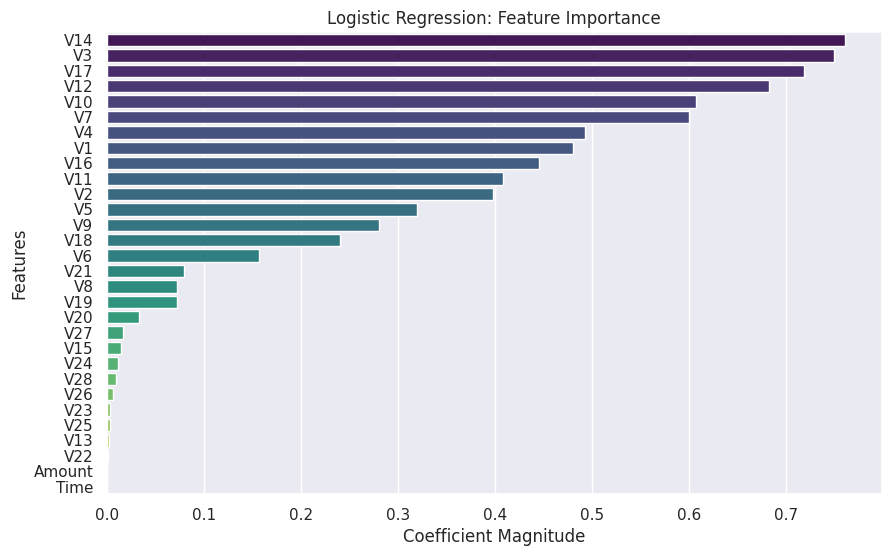

In [91]:
# Get the feature coefficients from the logistic regression model
if isinstance(X_train, np.ndarray):
    feature_importance = pd.Series(model.coef_[0], index=X.columns)
else:
    feature_importance = pd.Series(model.coef_[0], index=X_train_resampled.columns)

# Sort the coefficients in descending order
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot the important features
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance.values, y=sorted_feature_importance.index, palette='viridis')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Logistic Regression: Feature Importance')
plt.show()

> RANODM FOREST

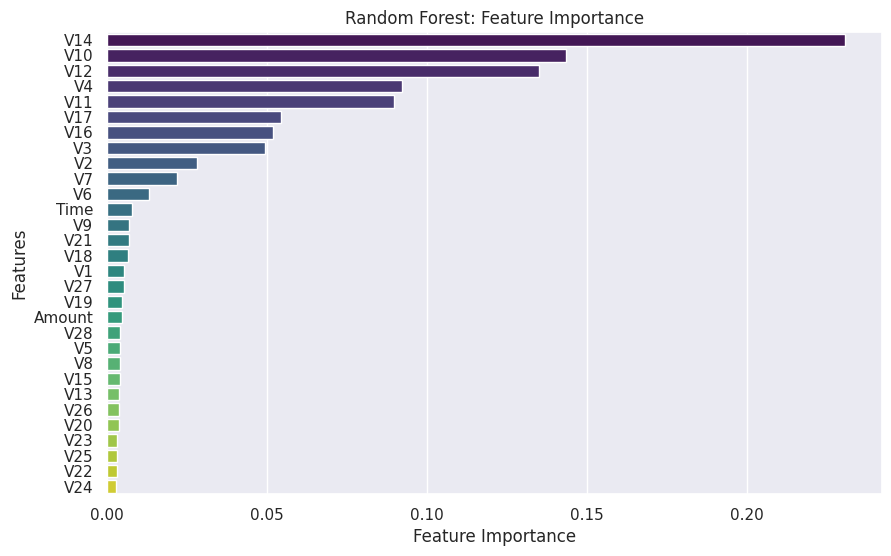

In [92]:
# Get the feature importances from the Random Forest model
if isinstance(X_train_resampled, np.ndarray):
    feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
else:
    feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train_resampled.columns)

# Sort the feature importances in descending order
sorted_feature_importance_rf = feature_importance_rf.abs().sort_values(ascending=False)

# Plot the important features for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance_rf.values, y=sorted_feature_importance_rf.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest: Feature Importance')
plt.show()

### COMPARING PRECISION RECALL (PR) CURVE

---



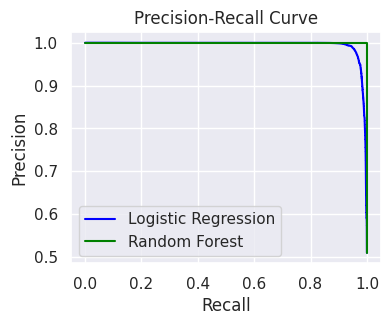

In [96]:
# Calculate Precision-Recall curve for Logistic Regression
precision_logistic, recall_logistic, thresholds_logistic = precision_recall_curve(y_train_resampled, pred_tr)

# Calculate Precision-Recall curve for Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_train_resampled, pred_tr_rf)

# Plot the Precision-Recall curve for Logistic Regression
plt.figure(figsize=(4, 3))
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression', color='blue')

# Plot the Precision-Recall curve for Random Forest
plt.plot(recall_rf, precision_rf, label='Random Forest', color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

> **INTERPRETATION**

---

> FROM PR CURVE IT IS EVIDENT THAT RANDOM FOREST PERFROMS BETTER THAN LOGISTIC REGRESSION IN CORRECTLY CLASSIFYING THE FRAUDULENT AND NON-FRAUDULENT TRANSACTIONS.